In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import os.path
%matplotlib inline

In [2]:
from camera import undistort
import thresholds

In [3]:
if not os.path.exists('test_images/straight_lines1_undistorted.jpg'):
    image = undistort(mpimg.imread('test_images/straight_lines1.jpg'))
    mpimg.imsave('test_images/straight_lines1_undistorted.jpg', image)
else:
    image = mpimg.imread('test_images/straight_lines1_undistorted.jpg')


In [24]:
nx, ny = image.shape[:2][::-1]
#src = np.float32([(233,ny-30), (595,ny-273), # left
#                  (nx-598, ny-273), (nx-207, ny-30)]) # right
# src = np.float32([(260,680), (568,470), # left
#                    (717, 470), (1043, 680)]) # right
# src = np.float32([(203,720), (585,460), # left
#                   (695, 460), (1127, 720)]) # right

# dst = np.float32([src[0], (src[0][0], 0), 
#                   (src[3][0], 0), src[3]])
# dst = np.float32([(320, 720), (320, 0), 
#                   (960, 0), (960, 720)])

# src = np.float32([(-531,685), (375,480), (905, 480), (1811, 685)])
# dst = np.float32([(0, 600), (0, 0), (500, 0), (500, 600)])

src = np.float32([(0,ny-93-1), (572-1-9,ny-275-1), (nx-562-1, ny-275-1), (nx-1, ny-93-1)])

# best for image 2 
#src = np.float32([(0,ny-93-1), (572-1-10,ny-275-1), (nx-562-1+1, ny-275-1), (nx-1, ny-93-1)])

dst = np.float32([src[0], (src[0][0], 0), 
                  (src[3][0], 0), src[3]])

#plt.plot([c[0] for c in src], [c[1] for c in src], color='red')
#plt.imshow(image)

In [21]:
M = cv2.getPerspectiveTransform(src, dst)

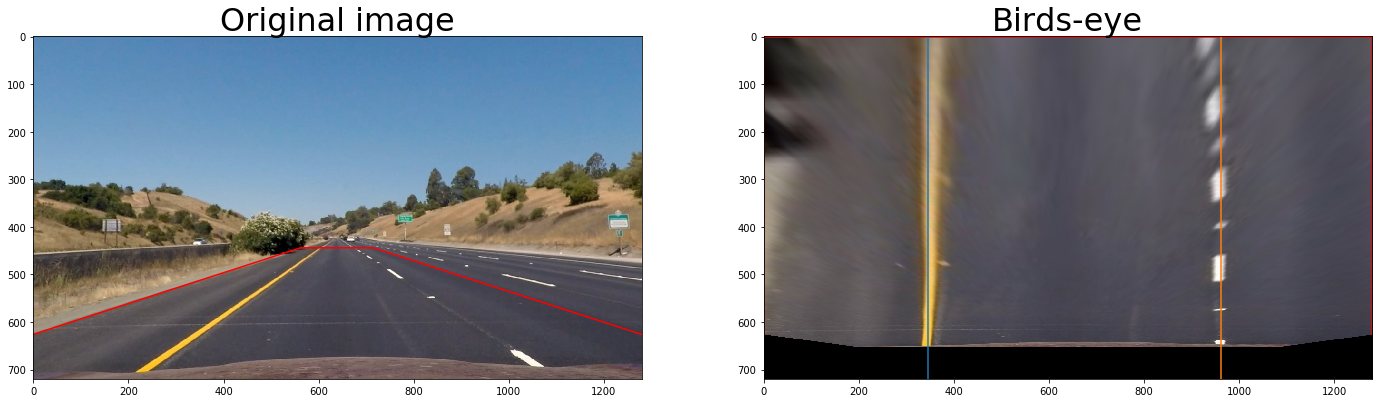

In [22]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 20))
ax1.plot([c[0] for c in src], [c[1] for c in src], color='red')
ax1.imshow(image)
ax1.set_title('Original image', fontsize=32)

warped = cv2.warpPerspective(image, M, (nx, ny))
ax2.set_title('Birds-eye', fontsize=32)
ax2.plot([c[0] for c in dst], [c[1] for c in dst], color='red')
ax2.plot([345]*2, [719, 0])
ax2.plot([962]*2, [719, 0])
ax2.imshow(warped)

In [23]:
test_image = undistort(mpimg.imread('test_images/straight_lines1.jpg'))

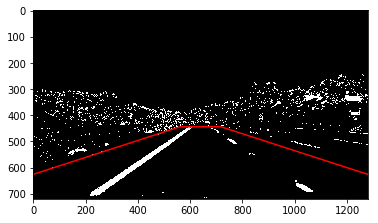

In [9]:
plt.plot([c[0] for c in src], [c[1] for c in src], color='red')
plt.imshow(thresholds.default(test_image), cmap='gray')

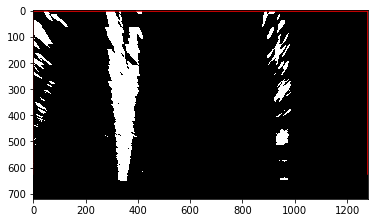

In [10]:
plt.plot([c[0] for c in dst], [c[1] for c in dst], color='red')
plt.imshow(cv2.warpPerspective(thresholds.default(test_image), M, (nx, ny)), cmap='gray')